# Hands-on Day 3

## You'll learn

### ML methods

- Deep NN with keras

# Initial setup 

- read in parquet file
- create x,y vectors from panda dataframe

In [1]:
%reload_ext custom_functions
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Check out these custom functions
from custom_functions import *

In [3]:
inputFile = 'file:///home/jovyan/Higgs100k.parquet'
#inputFile = 'file:///home/jovyan/Higgs1M.parquet'
#inputFile = 'file:///home/jovyan/Higgs10M.parquet'

%time df = pd.read_parquet(inputFile)

CPU times: user 186 ms, sys: 240 ms, total: 426 ms
Wall time: 208 ms


In [4]:
# The first column is the target variable
y = df.iloc[:, 0] #df with label
x = df.iloc[: , 1:] #df with all other variables

len(x)

99999

In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
#sanity check

print(len(x_train)+len(x_test))
print(len(y_train)+len(y_test))

99999
99999


# ML Models: Sequential

We will use Keras with Tensorflow as backend (supports multi-core and GPUs)

In [7]:
#ignore warnings from Tensorflow
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#warnings.simplefilter(action='ignore', category=DeprecationWarning)
import tensorflow as tf
#if type(tf.contrib) != type(tf): tf.contrib._warning = None
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

#import Keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping

np.random.seed(1337)  # for reproducibility

## Exercise 1

- documentation: https://keras.io/getting-started/sequential-model-guide/
- Build (compile) a Keras Sequential model (call it *model*)
  - 1 hidden layer  with 100 neurons, activation ReLU (put in the correct input_shape!)
  - 1 ouput layer with activation sigmoid
  - use Adam optimiser
  - use binary_crossentropy loss
  - use accuracy metrics 

In [8]:
# create the model
model = Sequential()
model.add(Input(shape=(28,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2900      
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 3,001
Trainable params: 3,001
Non-trainable params: 0
_________________________________________________________________


In [9]:
# compile the model
optim = Adam(learning_rate=0.01,beta_1=0.9, beta_2=0.999)

model.compile(optimizer=optim, loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [11]:
# set batch size according to size of the input sample!!!
# start training with reasonable numer of epoch

%time history = model.fit(x, y, batch_size=128, epochs=10, validation_data=(x_test, y_test), callbacks=[es]) #, verbose=0)

Epoch 1/10
782/782 [==============================] - 2s 2ms/step - loss: 0.6436 - accuracy: 0.6232 - val_loss: 0.6182 - val_accuracy: 0.6593
Epoch 2/10
782/782 [==============================] - 1s 2ms/step - loss: 0.6199 - accuracy: 0.6552 - val_loss: 0.6204 - val_accuracy: 0.6555
Epoch 3/10
782/782 [==============================] - 1s 2ms/step - loss: 0.6107 - accuracy: 0.6652 - val_loss: 0.6068 - val_accuracy: 0.6613
Epoch 4/10
782/782 [==============================] - 1s 2ms/step - loss: 0.6040 - accuracy: 0.6715 - val_loss: 0.5936 - val_accuracy: 0.6791
Epoch 5/10
782/782 [==============================] - 1s 2ms/step - loss: 0.5994 - accuracy: 0.6763 - val_loss: 0.5910 - val_accuracy: 0.6808
Epoch 6/10
782/782 [==============================] - 1s 2ms/step - loss: 0.5964 - accuracy: 0.6802 - val_loss: 0.5947 - val_accuracy: 0.6876
Epoch 7/10
782/782 [==============================] - 1s 2ms/step - loss: 0.5942 - accuracy: 0.6821 - val_loss: 0.5898 - val_accuracy: 0.6780
Epoch 

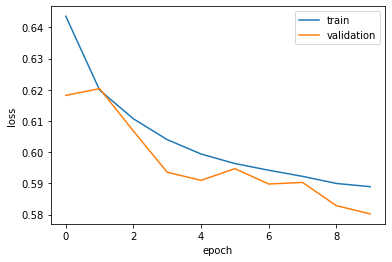

In [12]:
plotVsEpoch(history, 'loss')

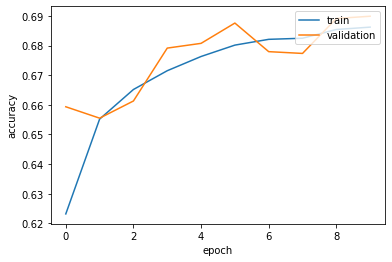

In [13]:
plotVsEpoch(history, 'accuracy')

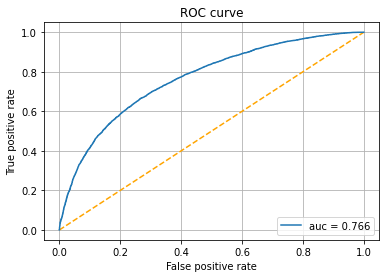

In [14]:
# apply model to get predictions on test set
y_pred = model.predict(x_test)

#draw ROC
drawROC2(y_test, y_pred)

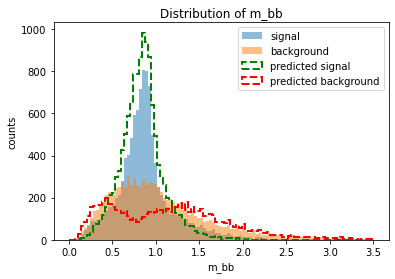

In [15]:
#plot signal vs background with prediction
variable = 'm_bb'

# Get the predicted probabilities for the positive class
y_pred_prob = model.predict(x_test).ravel()  # Use .ravel() to flatten to a 1D array

plotSignalvsBgWithPrediction2(x_test.loc[:, variable], y_test, y_pred_prob)

# Hyperparameters optimisation

- you can use [keras_tuner](https://keras.io/keras_tuner/) for hyperparameter optimisation

In [16]:
import keras_tuner as kt

In [17]:
# you may need to install it with
!pip install --user keras-tuner

## Exercise 2

- play with the model parameters and see if you can improve the performances
- try to increase the number of epochs for training, is the model improving?
- how is training time affected by the number of parameters?
- how is signal versus background separation affected (check different variables)

In [18]:
# read in input parquet file
#inputFile = 'file:///home/jovyan/Higgs100k.parquet'
inputFile = 'file:///home/jovyan/Higgs1M.parquet'

%time df = pd.read_parquet(inputFile)

#create train/test set
y = df.iloc[:, 0] #df with label
x = df.iloc[: , 1:] #df with all other variables

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
len(y)

CPU times: user 635 ms, sys: 2.68 s, total: 3.31 s
Wall time: 251 ms


999999

In [19]:
import keras_tuner as kt

# Define the model-building function
def build_model(hp):
    model = Sequential()

    # Tune the number of units in the hidden layers
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=256, step=32), activation='relu', input_dim=x_train.shape[1]))
    
    # Add a dropout layer - not a good idea because it is not used for inference
    # unwanted regularization effect that makes better accuracy on test than on train
    #model.add(Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
    
    # Output layer
    model.add(Dense(1, activation='sigmoid'))  # Binary classification

    # Tune the learning rate for the optimizer
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, 
                  max_value=1e-2, sampling='LOG')), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    
    return model

# Instantiate the tuner
tuner = kt.RandomSearch(
    build_model, 
    objective='val_accuracy',  # Optimization target
    max_trials=5,               # Number of models to try
    executions_per_trial=3,     # Number of executions for each trial
    directory='keras',         # Directory to store the results
    project_name='bigDataML'
)

# Run the hyperparameter search
%time tuner.search(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Get the best model and parameters
best_model = tuner.get_best_models(num_models=1)[0]
best_params = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters:")
print(f"Units: {best_params['units']}")
print(f"Dropout: {best_params['dropout']}")
print(f"Learning Rate: {best_params['learning_rate']}")

# Evaluate the best model
test_loss, test_acc = best_model.evaluate(x_test, y_test)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
192               |192               |units
0.00014151        |0.00014151        |learning_rate

Epoch 1/10
25000/25000 [==============================] - 41s 2ms/step - loss: 0.6336 - accuracy: 0.6388 - val_loss: 0.6211 - val_accuracy: 0.6589
Epoch 2/10
25000/25000 [==============================] - 41s 2ms/step - loss: 0.6076 - accuracy: 0.6689 - val_loss: 0.6018 - val_accuracy: 0.6688
Epoch 3/10
25000/25000 [==============================] - 41s 2ms/step - loss: 0.5942 - accuracy: 0.6825 - val_loss: 0.5900 - val_accuracy: 0.6898
Epoch 4/10
25000/25000 [==============================] - 41s 2ms/step - loss: 0.5863 - accuracy: 0.6898 - val_loss: 0.5824 - val_accuracy: 0.6945
Epoch 5/10
25000/25000 [==============================] - 41s 2ms/step - loss: 0.5798 - accuracy: 0.6953 - val_loss: 0.5777 - val_accuracy: 0.6993
Epoch 6/10
25000/25000 [==============================] - 41s 2ms/step - loss: 0.5745 - 

KeyboardInterrupt: 

Best Hyperparameters:
Units: 192


KeyError: 'dropout does not exist.'